BILINEAR INTERPOLATION


In [10]:
import cv2
import numpy as np
import math

In [11]:
img = cv2.imread("image.jpg", cv2.IMREAD_COLOR)

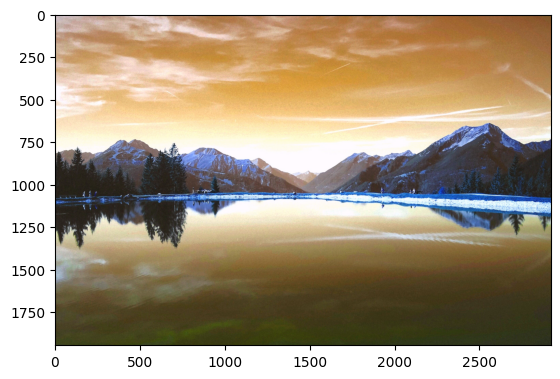

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [13]:
def bl_resize(original_img, new_h, new_w):
	#get dimensions of original image
	old_h, old_w, c = original_img.shape
	#create an array of the desired shape.
	#We will fill-in the values later.
	resized = np.zeros((new_h, new_w, c))
	#Calculate horizontal and vertical scaling factor
	w_scale_factor = (old_w ) / (new_w ) if new_h != 0 else 0
	h_scale_factor = (old_h ) / (new_h ) if new_w != 0 else 0
	for i in range(new_h):
		for j in range(new_w):
			#map the coordinates back to the original image
			x = i * h_scale_factor
			y = j * w_scale_factor
			#calculate the coordinate values for 4 surrounding pixels.
			x_floor = math.floor(x)
			x_ceil = min( old_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(old_w - 1, math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):
				q = original_img[int(x), int(y), :]
			elif (x_ceil == x_floor):
				q1 = original_img[int(x), int(y_floor), :]
				q2 = original_img[int(x), int(y_ceil), :]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				q1 = original_img[int(x_floor), int(y), :]
				q2 = original_img[int(x_ceil), int(y), :]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor, y_floor, :]
				v2 = original_img[x_ceil, y_floor, :]
				v3 = original_img[x_floor, y_ceil, :]
				v4 = original_img[x_ceil, y_ceil, :]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j,:] = q
	return resized.astype(np.uint8)

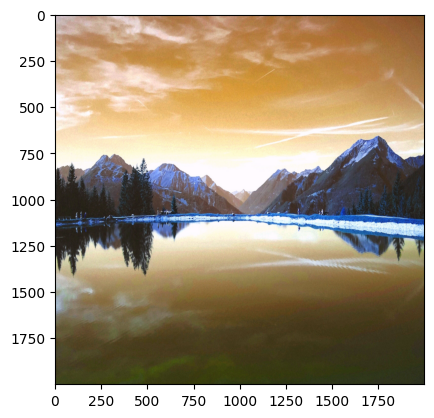

In [14]:
img_bl=bl_resize(img,2000, 2000)
plt.imshow(img_bl)

LINEAR INTERPOLATION


In [15]:
import cv2
import numpy as np

In [16]:
def linear_interpolation(image, new_width, new_height):
    # Get the original image dimensions
    height, width = image.shape[:2]

    # Calculate the scale factors
    x_scale = new_width / width
    y_scale = new_height / height

    # Define new coordinates
    new_x = np.arange(new_width)
    new_y = np.arange(new_height)

    # Generate a grid of new coordinates
    new_x_grid, new_y_grid = np.meshgrid(new_x, new_y, indexing='ij')

    # Scale the coordinates to match the original image
    src_x = new_x_grid / x_scale
    src_y = new_y_grid / y_scale

    # Find the integer coordinates and fractional parts for interpolation
    x0 = src_x.astype(int)
    y0 = src_y.astype(int)
    x1 = x0 + 1
    y1 = y0 + 1
    tx = src_x - x0
    ty = src_y - y0

    # Clip coordinates to stay within the image bounds
    x0 = np.clip(x0, 0, width - 1)
    y0 = np.clip(y0, 0, height - 1)
    x1 = np.clip(x1, 0, width - 1)
    y1 = np.clip(y1, 0, height - 1)

    if len(image.shape) == 2:  # Grayscale image
        # Perform linear interpolation for grayscale images
        interpolated_image = (1 - tx) * (1 - ty) * image[y0, x0] + \
                             tx * (1 - ty) * image[y0, x1] + \
                             (1 - tx) * ty * image[y1, x0] + \
                             tx * ty * image[y1, x1]
    elif len(image.shape) == 3:  # Color image
        # Perform linear interpolation for each color channel separately
        interpolated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)
        for i in range(image.shape[2]):
            interpolated_image[:, :, i] = (1 - tx) * (1 - ty) * image[y0, x0, i] + \
                                          tx * (1 - ty) * image[y0, x1, i] + \
                                          (1 - tx) * ty * image[y1, x0, i] + \
                                          tx * ty * image[y1, x1, i]
    else:
        raise ValueError("Unsupported image shape")

    return interpolated_image.astype(np.uint8)


In [19]:
img = cv2.imread("input.jpeg", cv2.IMREAD_COLOR)

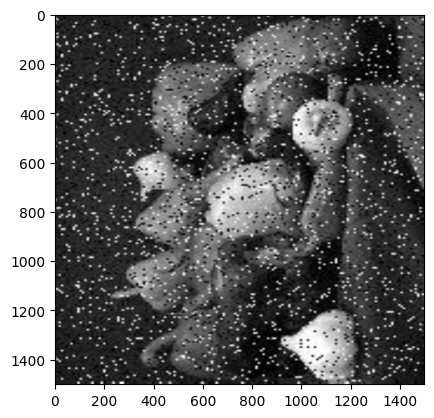

In [20]:
img_li=linear_interpolation(img,1500,1500)
plt.imshow(img_li)

Apply order statistics filter to remove salt pepper noise without
using OpenCV.

In [21]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt

In [22]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

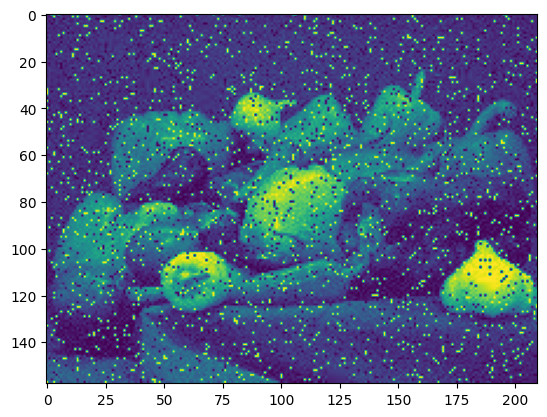

In [23]:
img1 = Image.open("input.jpeg").convert(
        "L")
arr = numpy.array(img1)
plt.imshow(img1)

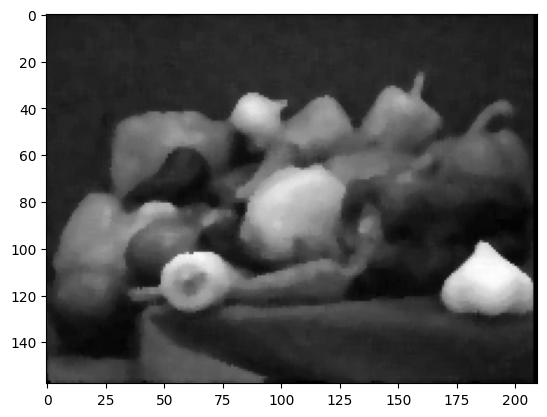

In [24]:
removed_noise = median_filter(arr, 5)
img2 = Image.fromarray(removed_noise)
plt.imshow(img2)